本文是学习keras作者关于tensorflow2.0的教程

In [ ]:
#安装tensorflow
!pip install tensorflow==2.0.0

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


#  Tensorflow2.0+Keras综述
*作者：fchollet,2019年10月*

---

**本文是关于Tensorflow2.0 API的简要介绍课程**

---
Tensorflow2.0和Keras都已经发布有四年之久（2015年3月Keras发布，同年11月Tensorflow发布）。在过去的日子里深度学习得到的迅速发展，同时我们也知道
Tensorflow1.x和Keras的一些问题：

---

- 使用Tensorflow意味着要对静态图进行编程，对于熟悉命令式编程的程序比较难而且不方便
- Tensorflow api功能强大并且灵活，但是比较复杂容易混乱，难以使用
- Keras api 生产力高并且易用，但是缺乏用于研究的灵活性

---

### Tensorflow2.0是Tensorflow1.x和Keras的组合设计，考虑了四年来的用户反馈和框架发展，很大程度上解决了上述问题，将成为未来的机器学习平台。

Tensorflow2.0构建在以下的核心思想之上：
- 编码更加pythonic,使有户像在用numpy编程一样，能立即获得结果
- 保留了静态图的特性（为了性能、分布式和生产布署），这使TensorFlow快速，可扩展且可投入生产。
- 使用Keras作为深度学习的高级api,使得Tensorflow变得易用高效
- 使整个框架兼有高级特性（易用，高效，不够灵活）和低级特性（功能强大可扩展，不易使用，但非常灵活）


# 第一部分：Tensorflow基础

## Tensors张量

[常量constant](https://www.tensorflow.org/api_docs/python/tf/constant):

In [2]:
x = tf.constant([[4,2],[9,5]])
print(x)

tf.Tensor(
[[4 2]
 [9 5]], shape=(2, 2), dtype=int32)


可以通过“.numpy()”来得到numpy array类型

In [3]:
x.numpy()

array([[4, 2],
       [9, 5]], dtype=int32)

像numpy一样，有`shape`和`dtype`属性

In [4]:
print('shape:',x.shape)
print('dx.dtype)

(2, 2)
<dtype: 'int32'>


常用的产生常量的方法是`tf.ones`和`tf.zeros`就像numpy的`np.ones``np.zeros`

In [9]:
print(tf.ones(shape=(2,3)))
print(tf.zeros(shape=(3,2)))

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)


## 随机数常量[random constant正态分布](https://www.tensorflow.org/api_docs/python/tf/random/normal)

In [11]:
tf.random.normal(shape=(2,2),mean=0,stddev=1.0)

<tf.Tensor: id=12, shape=(2, 2), dtype=float32, numpy=
array([[-0.05229542,  0.64488363],
       [ 0.37966082,  1.0098479 ]], dtype=float32)>

In [12]:
#整数均匀分布
tf.random.uniform(shape=(2,2),minval=0,maxval=10,dtype=tf.int32)

<tf.Tensor: id=16, shape=(2, 2), dtype=int32, numpy=
array([[6, 3],
       [8, 7]], dtype=int32)>

## 2.3 Variables变量

[变量](https://www.tensorflow.org/guide/variable)是一种特别的张量，用来存储可变数值，需要用一些值来初始化

In [5]:
initial_value = tf.random.normal(shape=(2,2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.07630513, -0.39769924],
       [-0.9712114 , -0.62955064]], dtype=float32)>


 可以通过assign(value)来赋值“=”，或assign_add(value)“+=”，或assign_sub(value)“-=”

In [6]:
new_value = tf.random.normal(shape=(2, 2))
a.assign(new_value)
for i in range(2):
    for j in range(2):
        assert a[i, j] == new_value[i, j]

In [7]:
added_value = tf.random.normal(shape=(2,2))
a.assign_add(added_value)
for i in range(2):
    for j in range(2):
        assert a[i,j] == new_value[i,j]+added_value[i,j]

## Tensorflow数学运算

可以像numpy那样做作运算，Tensorflow的不同时这些运算可以放到GPU或TPU上执行

In [8]:
a = tf.random.normal(shape=(2,2))
b = tf.random.normal(shape=(2,2))
c = a+b
d = tf.square(c)
e = tf.exp(c)
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[ 1.6862711 -1.4246397]
 [-1.0287055 -1.3188182]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.4519434  0.7635907]
 [ 1.1213834 -1.4559215]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 3.1382146  -0.661049  ]
 [ 0.09267795 -2.7747397 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[9.8483906e+00 4.3698579e-01]
 [8.5892025e-03 7.6991806e+00]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[23.062654    0.51630944]
 [ 1.0971084   0.0623657 ]], shape=(2, 2), dtype=float32)


## `GradientTape`计算梯度

和numpy的另一个不同是，可以自动跟踪任何变量的梯度。
打开一个[`GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape),然后通过`tape.watch()`来跟踪变量

In [10]:
a = tf.random.normal(shape=(2,2))
b = tf.random.normal(shape=(2,2))
with tf.GradientTape() as tape:
    tape.watch(a)#开始记录所有有关a参与过的运算
    c = tf.sqrt(tf.square(a)+tf.square(b)) #变量a做一些运算
    #计算c对于a的梯度
    dc_da = tape.gradient(c,a)
    print(dc_da)

tf.Tensor(
[[-0.53557533  0.87920487]
 [ 0.24663754  0.4680054 ]], shape=(2, 2), dtype=float32)


对于所有变量，默认状态下会跟踪计算并用来求梯度，所以不用使用`tape.watch()`

In [11]:
a = tf.Variable(a)
with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a)+tf.square(b))
    dc_da = tape.gradient(c,a)
    print(dc_da)

tf.Tensor(
[[-0.53557533  0.87920487]
 [ 0.24663754  0.4680054 ]], shape=(2, 2), dtype=float32)


可以通过多开几个`GradientTape`来求高阶导数：

In [12]:
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as tape:
        c = tf.sqrt(tf.square(a)+tf.square(b))
        dc_da = tape.gradient(c,a)
    d2c_d2a = outer_tape.gradient(dc_da,a)
    print(d2c_d2a)

tf.Tensor(
[[0.54411626 0.33872807]
 [1.5284648  0.5024241 ]], shape=(2, 2), dtype=float32)


## 一个完整的例子：linear regression 线性回归

到目前已经讲了像numpy一样的运算方式，但可在GPU或TPU上加速，并且会求梯度。下面展示一个完整的示例：线性回归。
为了演示，不会使用有知keras的高级api(Layer 或MeanSquaredError),仅使用最基本运算：

In [13]:
input_dim=2
output_dim=1
learning_rate = 0.01
#weight matrix
w=tf.Variable(tf.random.normal(shape=(input_dim,output_dim)))
#bias
b=tf.Variable(tf.random.normal(shape=(output_dim,)))

def compute_predictions(features):
    return tf.matmul(features,w)+b
def compute_loss(labels,predictions):
    return tf.reduce_mean(tf.square(labels-predictions))

def train_on_batch(x,y):
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y,predictions)
        #tape.gradient对于多个变量求梯度也是可以的
        dloss_w,dloss_b=tape.gradient(loss,[w,b])
    w.assign_sub(learning_rate*dloss_w)
    b.assign_sub(learning_rate*dloss_b)
    return loss

生成一些假数据来展示我们的线性回归算法

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#准备数据
num_samples=10000

negative_samples = np.random.multivariate_normal(mean=[0,3],cov=[[1,0.5],[0.5,1]],size=num_samples)
print('negative_samples.shape',negative_samples.shape)
positive_samples = np.random.multivariate_normal(mean=[3,0],cov=[[1,0.5],[0.5,1]],size=num_samples)
print('positive_sample.shape',positive_samples.shape)
features = np.vstack((negative_samples,positive_samples)).astype(np.float32)
print("features.shape",features.shape)
labels = np.vstack((np.zeros((num_samples,1),dtype=np.float32),np.ones((num_samples,1),dtype=np.float32)))
print("labels.shape",labels.shape)

negative_samples.shape (10000, 2)
positive_sample.shape (10000, 2)
features.shape (20000, 2)
labels.shape (20000, 1)


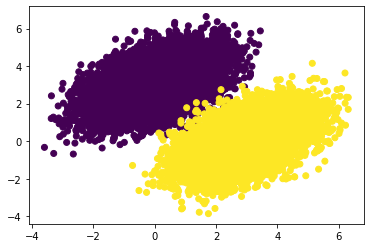

In [19]:
plt.scatter(features[:,0],features[:,1],c=labels[:,0])

现在使用batch数据开始训练线性回归模型

In [21]:
#shuffle data打散数据
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

#使用tf.data来生成batch数据，方便循环使用
dataset = tf.data.Dataset.from_tensor_slices((features,labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)
#训练
for epoch in range(10):
    for step,(x,y) in enumerate(dataset):
        loss = train_on_batch(x,y)
        
    print("Epoch %d: last batch loss = %.4f" %(epoch,float(loss)))

Epoch 0: last batch loss = 0.1631
Epoch 1: last batch loss = 0.1252
Epoch 2: last batch loss = 0.0770
Epoch 3: last batch loss = 0.0565
Epoch 4: last batch loss = 0.0325
Epoch 5: last batch loss = 0.0245
Epoch 6: last batch loss = 0.0470
Epoch 7: last batch loss = 0.0326
Epoch 8: last batch loss = 0.0316
Epoch 9: last batch loss = 0.0216


测试模型性能

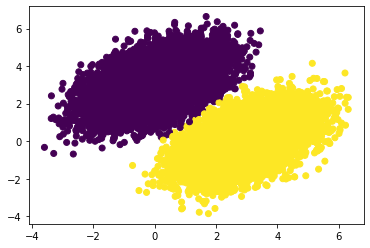

In [22]:
predictions = compute_predictions(features)
plt.scatter(features[:,0],features[:,1],c=predictions[:,0]>0.5)

## 接下来加速训练速度，要使用`tf.function`

先计算我们现在代码的计算速度

In [24]:
import time
t0=time.time()
for epoch in range(20):
    for step,(x,y) in enumerate(dataset):
        loss = train_on_batch(x,y)
t_end = time.time()-t0
print("Time per epoch: %.3f s" %(t_end/20,))

Time per epoch: 0.145 s


将训练函数编译成静态图，只需要加上tf.function的python装饰器

In [25]:
@tf.function
def train_on_batch(x,y):
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y,predictions)
        dloss_w,dloss_b = tape.gradient(loss,[w,b])
    w.assign_sub(learning_rate*dloss_w)
    b.assign_sub(learning_rate*dloss_b)
    return loss

再次使用：

In [27]:
t0=time.time()
for epoch in range(20):
    for step,(x,y) in enumerate(dataset):
        loss = train_on_batch(x,y)
t_end = time.time()-t0
print("Time per epoch: %.5f s" %(t_end/20,))

Time per epoch: 0.05802 s


大约有50%以上的提速。我们仅是使用一个小的模型，如果是真实的更大的模型，转换成静态图后，会有更大的提升。
eager模式方便debugging,并且可以对每一行实时可见结果；但如果要更快运行速度，转换成静态图会更好。

# 第二部分：Keras API

keras 是深度学习高级api,有以下几点需要知道：
- 对于工程师，Keras提供了现成的模块，比如layers,metrics,training loops等来支持常规的使用，易用且能产品化
- 对于研究究人员，也许并不想用内建模块，而是要用自己定义的。Keras同样提供支持，有自定义模块的模版，方便定义且与其它人交互。
- 对于库开发人员，Tensorflow是一个很大的生态系统，包含许多不同版本的库，为了不同库之间的交互，需要同样标准。

整体就是使整个框架兼备灵活性和高级api使用的便利性。
![Spectrum of Keras workflows](https://keras-dev.s3.amazonaws.com/tutorials-img/spectrum-of-workflows.png)

## 基础类`Layer`
第一个需要学习的类就是[`Layer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer),基本上所有的keras api是以这个类为基础的。
Layer类中封装一些状态（如权重）和计算（在call方法中定义）。

In [14]:
from tensorflow.keras.layers import Layer
class Linear(Layer):
    """y=wx+b"""
    def __init__(self,units=32,input_dim=32):
        super().__init__()
        w_init=tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape=(input_dim,units),dtype=tf.float32),trainable=True)
        b_init=tf.zeros_initializer()
        self.b = tf.Variable(initial_value=b_init(shape=(units,),dtype=tf.float32),trainable=True)
    def call(self,inputs):
        return tf.matmul(inputs,self.w)+self.b
#实例化
linear_layer = Linear(4,2)

类实例化以后可以像函数一样使用

In [16]:
y = linear_layer(tf.ones((2, 2)))
assert y.shape == (2, 4)

Layer类将自动完成对类的跟踪更新

In [17]:
#所有权重都在`weights`的属性中
assert linear_layer.weights==[linear_layer.w,linear_layer.b]

linear_layer.weights

另外还有一种定义变量的快速方法,使用`add_weight`,对比两种方法：
```python
w_init = tf.random_normal_initializer()
self.w = tf.Variable(initial_value=w_init(shape=shape,dtype=tf.float32))
```
可以快速使用：
```python
self.w = self.add_weight(shape=shape,initializer'random_normal')
```

更好的定义权重方法是在一个类中的build方法中定义变量，这样做的好处是不需要指定输入数据的形状input_dim,第一层见到输入会获取到形状

In [3]:
class Linear(Layer):
    """y=wx+b"""
    def __init__(self,units=32):
        super().__init__()
        self.units = units
    def build(self,input_shape):
        self.w = self.add_weight(shape=(input_shape[-1],self.units),initializer=tf.random_normal_initializer(),trainable=True)
        self.b = self.add_weight(shape=self.units,initializer=tf.constant_initializer(),trainable=True)
    def call(self,inputs):
        return tf.matmul(inputs,self.w)+self.b
#实例化
linear_layer = Linear(4)
#调用build方法并生成权重
y = linear_layer(tf.ones((2,2)))
assert len(linear_layer.weights)==2

## Trainable and non-trainable weights可训练和不可训练参数

通过layer中产生的变量要么是可训练的要么是不可训练的，它们被分别放在`trainable_weights`和`non_trainable_weights`

In [27]:
from tensorflow.keras.layers import Layer

class ComputeSum(Layer):
    """return the sum of the inputs"""
    def __init__(self,input_dim):
        super().__init__()
        #创建一个不可训练变量
        self.total = tf.Variable(initial_value=tf.zeros(shape=(input_dim,)),trainable=False)
    def call(self,inputs):
        self.total.assign_add(tf.reduce_sum(inputs,axis=0))
        return self.total
my_sum = ComputeSum(2)
x = tf.ones((2,2))

y = my_sum(x)
print(y.numpy())
y=my_sum(x)
print(y.numpy())
assert my_sum.weights==[my_sum.total]
assert my_sum.non_trainable_weights==[my_sum.total]
assert my_sum.trainable_weights==[]

[2. 2.]
[4. 4.]


## 堆叠网络层

神经网络可以通过递归堆成更大的网络，每一层可以自动更踪trainable和non-trainable weights

In [30]:
#再次使用Linear类，使用有build方法的那个
class MLP(Layer):
    """堆叠多个Linear层"""
    def __init__(self):
        super().__init__()
        self.linear_1 = Linear(32)
        self.linear_2 = Linear(32)
        self.linear_3 = Linear(10)
    def call(self,inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        x = self.linear_3(x)
        return x
mlp = MLP()
#第一次调用mlp将产生变量
y = mlp(tf.ones(shape=(3,64)))
#所有变量都有跟踪记录
assert len(mlp.weights)==6
        

## 内建层

Keras内部有许多构[建好的层](https://www.tensorflow.org/api_docs/python/tf/keras/layers/),所以很多情况下不需要自己定义新的Layer.

- convolution layers 卷积层
- transposed convolution 逆卷积
- separateable convolution 可分离卷积
- average and max pooling 平均池化和最大值池化
- global average and max pooling全局平均和最大值池化
- LSTM,GRU(支持cuDNN加速）
- batchnormalization 批归一化
- dropout 随机舍弃
- attention 注意力机制
- convlstm2d
- etc 等

Keras 的参数配置使用常用的公开的参数，所以在大多数情况不重新定义参数而是使用默认的值，会得到较好的结果。例如`LSTM`初始化用正交矩阵，遗忘门使用偏置1。

## `call`方法中的`training`参数

有一些层，特别是`BatchNormalization`和`Dropout`，在训练和推理阶段有不同的作用，需要在调用时指定training是True还是False。



In [5]:
from tensorflow.keras.layers import Layer

class Dropout(Layer):
    def __init__(self,rate):
        super().__init__()
        self.rate=rate
    def call(self,inputs,training=None):
        if training:
            return tf.nn.dropout(inputs,rate=self.rate)
        return inputs

class MLPWithDropout(Layer):
    def __init__(self):
        super().__init__()
        self.linear_1 = Linear(32)
        self.dropout = Dropout(0.5)
        self.linear_2 = Linear(10)
    def call(self,inputs,training=None):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.dropout(x,training=training)
        x = self.linear_2(x)
        return x
mlp = MLPWithDropout()
y_train = mlp(tf.ones((2,2)),training=True)
y_test = mlp(tf.ones((2,2)),training=False)

## 函数式编程

写模型并不是总要用面向对像编程的，可以使用函数的面向过程的方法，官方称之为"Functional API"